Project Summary:
This project focuses on building a sales forecasting model using machine learning techniques.
Historical sales data was analyzed, cleaned, and transformed into time-based features.
A linear regression model was trained to predict future sales trends, helping businesses
make data-driven decisions for inventory and demand planning.


In [4]:
import pandas as pd

df = pd.read_csv("sales_data.csv", encoding="latin1")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Sort by date
df = df.sort_values('Order Date')

df[['Order Date', 'Sales']].head()


,Order Date,Sales
7980,2014-01-03,16.448
739,2014-01-04,11.784
740,2014-01-04,272.736
741,2014-01-04,3.540
1759,2014-01-05,19.536


In [6]:
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

daily_sales.head()



,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


Data Preparation:
The order date column was converted into datetime format and the data was sorted chronologically. Sales were then aggregated on a daily basis to prepare the dataset for time-based forecasting.

In [7]:
daily_sales['Day'] = daily_sales['Order Date'].dt.day
daily_sales['Month'] = daily_sales['Order Date'].dt.month
daily_sales['Year'] = daily_sales['Order Date'].dt.year

daily_sales.head()


,Order Date,Sales,Day,Month,Year
0,2014-01-03,16.448,3,1,2014
1,2014-01-04,288.060,4,1,2014
2,2014-01-05,19.536,5,1,2014
3,2014-01-06,4407.100,6,1,2014
4,2014-01-07,87.158,7,1,2014


In [8]:
X = daily_sales[['Day', 'Month', 'Year']]
y = daily_sales['Sales']


In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [10]:
daily_sales['Predicted Sales'] = model.predict(X)
daily_sales.head()


,Order Date,Sales,Day,Month,Year,Predicted Sales
0,2014-01-03,16.448,3,1,2014,612.853543
1,2014-01-04,288.060,4,1,2014,606.952007
2,2014-01-05,19.536,5,1,2014,601.050471
3,2014-01-06,4407.100,6,1,2014,595.148936
4,2014-01-07,87.158,7,1,2014,589.247400


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y, daily_sales['Predicted Sales'])
rmse = np.sqrt(mean_squared_error(y, daily_sales['Predicted Sales']))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 1464.913212647868
RMSE: 2219.032428661828


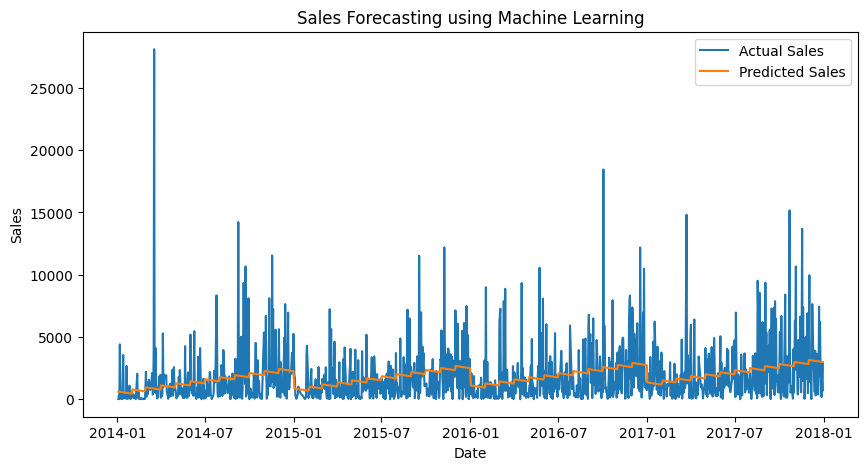

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(daily_sales['Order Date'], y, label='Actual Sales')
plt.plot(daily_sales['Order Date'], daily_sales['Predicted Sales'], label='Predicted Sales')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecasting using Machine Learning")
plt.legend()
plt.show()


Business Insights:
This sales forecasting model helps businesses predict future demand based on historical data.
It supports better inventory planning, reduces overstocking, and improves financial decisions.
